Preprocessing(前処理)
- 基礎統計量
- 欠損値: isnull(), fillna(), impute
- 散布図
- ヒストグラム
- カテゴリカル処理
 - One Hot Encoder / pd.get_dummies
 - Label Encoder
- ビニング: 間隔設定
- 日付加工

ここでは上記において、前処理を学習します<br/>
data: https://signate.jp/competitions/102/data

# Preprocessing(前処理)

まずはデータを読み込みましょう<br/>
pandas, numpy, matplotlibをImport

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('train.tsv', sep='\t')

In [3]:
train

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,3,1,1,female,35.0,1,0,53.1000,S
1,4,0,3,male,35.0,0,0,8.0500,S
2,7,0,3,male,2.0,3,1,21.0750,S
3,9,1,2,female,14.0,1,0,30.0708,C
4,11,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...,...
440,873,0,3,male,47.0,0,0,9.0000,S
441,874,1,2,female,28.0,1,0,24.0000,C
442,879,1,1,female,56.0,0,1,83.1583,C
443,884,0,3,male,25.0,0,0,7.0500,S


## 基礎統計量

まずはdescribe()で基礎統計量を確認しましょう

In [4]:
train.describe()

,id,survived,pclass,age,sibsp,parch,fare
count,445.000000,445.000000,445.000000,360.000000,445.000000,445.000000,445.000000
mean,456.002247,0.402247,2.296629,29.211583,0.546067,0.431461,33.959971
std,256.703351,0.490903,0.834024,14.154300,1.195247,0.850489,52.079492
min,3.000000,0.000000,1.000000,0.670000,0.000000,0.000000,0.000000
25%,227.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.925000
50%,463.000000,0.000000,3.000000,28.000000,0.000000,0.000000,15.000000
75%,679.000000,1.000000,3.000000,37.250000,1.000000,1.000000,31.387500
max,888.000000,1.000000,3.000000,80.000000,8.000000,5.000000,512.329200


次に、数値以外のカラムを含めてすべてのカラムの基礎統計量を確認しましょう。(include='all')

In [5]:
train.describe(include='all')

,id,survived,pclass,sex,age,sibsp,parch,fare,embarked
count,445.000000,445.000000,445.000000,445,360.000000,445.000000,445.000000,445.000000,443
unique,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,male,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,289,NaN,NaN,NaN,NaN,325
mean,456.002247,0.402247,2.296629,NaN,29.211583,0.546067,0.431461,33.959971,NaN
std,256.703351,0.490903,0.834024,NaN,14.154300,1.195247,0.850489,52.079492,NaN
min,3.000000,0.000000,1.000000,NaN,0.670000,0.000000,0.000000,0.000000,NaN
25%,227.000000,0.000000,2.000000,NaN,20.000000,0.000000,0.000000,7.925000,NaN
50%,463.000000,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,15.000000,NaN
75%,679.000000,1.000000,3.000000,NaN,37.250000,1.000000,1.000000,31.387500,NaN


カテゴリー変数に対してsexにどのような種類があり、それぞれの数を確認しましょう(unique, nunique, value_counts)

In [6]:
train['sex'].unique()

array(['female', 'male'], dtype=object)

In [7]:
train['sex'].nunique()

2

In [8]:
train['sex'].value_counts()

male      289
female    156
Name: sex, dtype: int64

## 欠損値: isnull(), fillna(), impute
isnull().any()<br/>
isnull().sum()<br/>
fillna()<br/>

In [10]:
train.isnull().any()

id          False
survived    False
pclass      False
sex         False
age          True
sibsp       False
parch       False
fare        False
embarked     True
dtype: bool

In [12]:
train.isnull().sum()

id           0
survived     0
pclass       0
sex          0
age         85
sibsp        0
parch        0
fare         0
embarked     2
dtype: int64

fillnaでageの欠損値に0に設定する

In [24]:
_tmp = train['age']
_tmp.head(10)

0    35.0
1    35.0
2     2.0
3    14.0
4    58.0
5    39.0
6     2.0
7     NaN
8    28.0
9     8.0
Name: age, dtype: float64

In [25]:
_tmp = _tmp.fillna(0)
_tmp.head(10)

0    35.0
1    35.0
2     2.0
3    14.0
4    58.0
5    39.0
6     2.0
7     0.0
8    28.0
9     8.0
Name: age, dtype: float64

In [27]:
_tmp = train['age']
_tmp.head(10)

0    35.0
1    35.0
2     2.0
3    14.0
4    58.0
5    39.0
6     2.0
7     NaN
8    28.0
9     8.0
Name: age, dtype: float64

欠損値をageの平均値を設定する

In [28]:
_tmp = _tmp.fillna(_tmp.mean())
_tmp.head(10)

0    35.000000
1    35.000000
2     2.000000
3    14.000000
4    58.000000
5    39.000000
6     2.000000
7    29.211583
8    28.000000
9     8.000000
Name: age, dtype: float64

Imputeを使って、fillnaと同じことをしてみる

In [59]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer()
imp.fit(train[['age']])
_tmp = imp.transform(train[['age']])

In [60]:
_tmp

array([[35.        ],
       [35.        ],
       [ 2.        ],
       [14.        ],
       [58.        ],
       [39.        ],
       [ 2.        ],
       [29.21158333],
       [28.        ],
       [ 8.        ],
       [38.        ],
       [29.21158333],
       [29.21158333],
       [29.21158333],
       [29.21158333],
       [66.        ],
       [29.21158333],
       [27.        ],
       [29.21158333],
       [ 3.        ],
       [19.        ],
       [29.21158333],
       [29.        ],
       [21.        ],
       [28.5       ],
       [ 5.        ],
       [11.        ],
       [38.        ],
       [ 4.        ],
       [19.        ],
       [26.        ],
       [32.        ],
       [21.        ],
       [26.        ],
       [22.        ],
       [29.21158333],
       [28.        ],
       [17.        ],
       [16.        ],
       [29.21158333],
       [23.        ],
       [20.        ],
       [26.        ],
       [59.        ],
       [29.21158333],
       [34

## 折れ線グラフ

<AxesSubplot:>

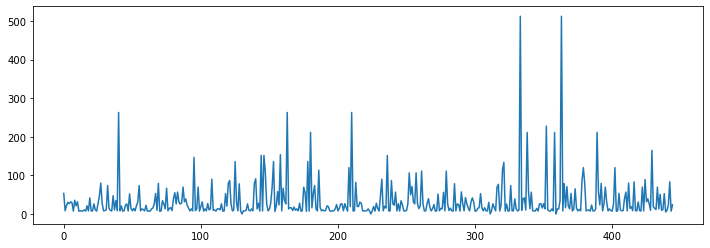

In [39]:
train['fare'].plot(figsize=(12, 4))

## 散布図

<AxesSubplot:xlabel='id', ylabel='fare'>

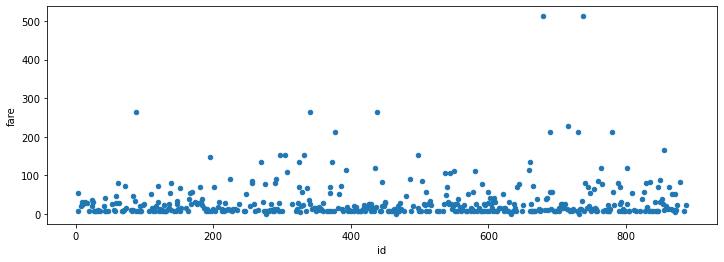

In [42]:
train.plot.scatter('id', 'fare', figsize=(12, 4))

## ヒストグラム

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'survived'}>,
        <AxesSubplot:title={'center':'pclass'}>],
       [<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sibsp'}>,
        <AxesSubplot:title={'center':'parch'}>],
       [<AxesSubplot:title={'center':'fare'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

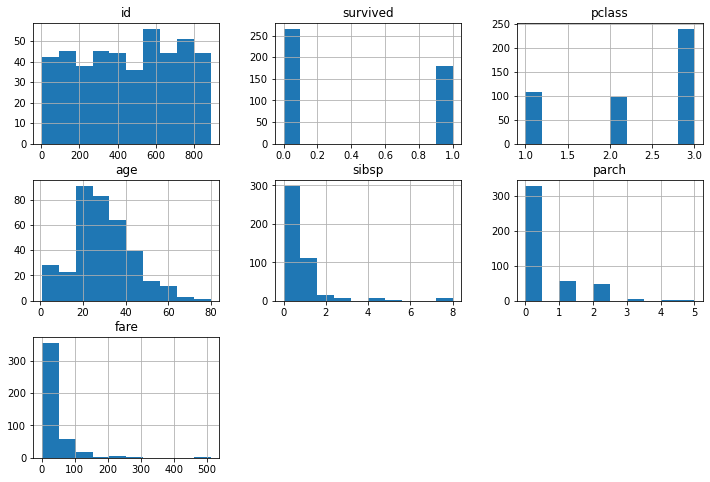

In [45]:
train.hist(figsize=(12, 8))

## カテゴリカル処理

### One Hot Encoder / pd.get_dummies

### get_dummies

In [49]:
train['sex']

0      female
1        male
2        male
3      female
4      female
        ...  
440      male
441    female
442    female
443      male
444    female
Name: sex, Length: 445, dtype: object

In [48]:
pd.get_dummies(train['sex'])

,female,male
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
440,0,1
441,1,0
442,1,0
443,0,1


### OneHotEncoder

In [62]:
!pip install category_encoders

  Using cached category_encoders-2.2.2-py2.py3-none-any.whl (80 kB)


In [63]:
import category_encoders as ce

ohe = ce.OneHotEncoder(handle_unknown='impute')
ohe.fit(train[['sex']])
_tmp = ohe.transform(train[['sex']])

d:\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [64]:
_tmp

,sex_1,sex_2
0,1,0
1,0,1
2,0,1
3,1,0
4,1,0
...,...,...
440,0,1
441,1,0
442,1,0
443,0,1


### Label Encoder

In [67]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le.fit(train['sex'])
le.transform(train['sex'])

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,

## ビニング: 間隔設定

In [86]:
train['fare'].describe()

count    445.000000
mean      33.959971
std       52.079492
min        0.000000
25%        7.925000
50%       15.000000
75%       31.387500
max      512.329200
Name: fare, dtype: float64

In [87]:
pd.cut(train['fare'], [0, 10, 15, 50, 513])

0      (50, 513]
1        (0, 10]
2       (15, 50]
3       (15, 50]
4       (15, 50]
         ...    
440      (0, 10]
441     (15, 50]
442    (50, 513]
443      (0, 10]
444     (15, 50]
Name: fare, Length: 445, dtype: category
Categories (4, interval[int64]): [(0, 10] < (10, 15] < (15, 50] < (50, 513]]

In [101]:
s_cut = pd.cut(train['fare'], 4, labels=['Q1', 'Q2', 'Q3', 'Q4'])
s_cut

0      Q1
1      Q1
2      Q1
3      Q1
4      Q1
       ..
440    Q1
441    Q1
442    Q1
443    Q1
444    Q1
Name: fare, Length: 445, dtype: category
Categories (4, object): ['Q1' < 'Q2' < 'Q3' < 'Q4']

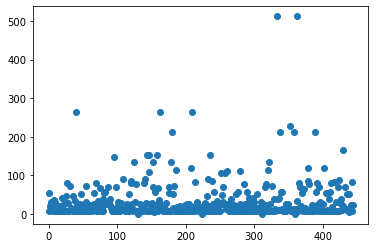

In [99]:
plt.scatter(train.index, train['fare'])

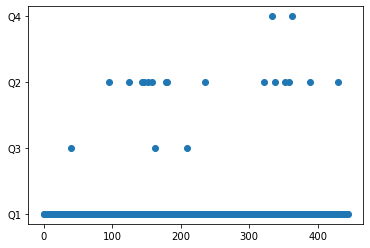

In [102]:
plt.scatter(train.index, s_cut)

## 日付加工

In [103]:
date = '2020-09-06'

In [107]:
year, month, day = date.split('-')
year, month, day

('2020', '09', '06')